# Lake-Victoria-Basin-Climate-data-analysis: Code4Africa Data Analyst Exercise

A group of journalists reporting in the Nile Basin region has access to historic and projected rainfall and runoff data in the Lake Victoria Basin.

The aim of this notebook is to take us through a step by step data cleaning, analysis, insights generation, visualization and final reporting of the data exploration.

In [ ]:
#inputing and declaring the source URL for seamless dataset retrieval 
URL = 'https://openafrica.net/dataset/historic-and-projected-rainfall-and-runoff-for-4-lake-victoria-sub-regions'

# Importing all required libraries for analysis and data exploration

In [ ]:
#importing all libraries to utilize in our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import scipy.stats  as stats
import pandas_profiling
%matplotlib inline

# Reading in datasets for analysis

In [56]:
#Ensuring the datasets are indexed by the time column for easier analysis

df1 = pd.read_csv('kagera-sub-region-historic-and-projected-rainfall.csv', index_col='Time')

df2 = pd.read_csv('lake-victoria-sub-region-historic-and-projected-rainfall.csv',index_col='Time')

df3 = pd.read_csv('simiyu-sub-region-historic-and-projected-rainfall.csv',index_col='Time')

df4 = pd.read_csv('victoria-nile-sub-region-historic-and-projected-rainfall.csv') #needs all columns renamed & columns transformed from objects to floats variables 

df5 = pd.read_csv('runoff-kagera-sub-region-historic-and-projected.csv',index_col='Time')

df6 = pd.read_csv('runoff-lake-victoria-sub-region-historic-and-projected.csv',index_col='Time') #needs Avg Min and Max renamed

df7 = pd.read_csv('runoff-simiyu-sub-region-historic-and-projected.csv', index_col='Time')

df8 = pd.read_csv('runoff-victoria-nile-sub-region-historic-and-projected.csv', index_col='Time')

In [57]:
df4.head()

,description==Monthly Victoria Nile mm/d,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Time,Jan.,Feb.,March,April,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.,Avg.,Min.,Max.
1,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.076,2.17,10.265,0.941,2.565,3.407,1.582
2,2001,0.438,0.185,0.534,11.482,4.52,0.89,0.529,1.21,6.332,2.791,9.249,0.324,3.207,0.185,11.482
3,2002,1.473,0.104,2.912,5.521,1.744,0.174,0.203,4.236,5.284,14.91,1.419,0.166,3.179,0.104,14.91
4,2003,3.71,0.143,0.485,0.188,2.119,3.3,7.281,1.341,2.949,0.411,5.429,2.363,2.476,0.143,7.281


# Data exploration

In [58]:
#df1.head() to explore the datasets, columns and alignment
#change the df1 to df2, df3, df4, df5, df6, df7, and df8 to explore the dataset
df1.tail()

#using the dtypes() method to display the different datatypes available
df1.dtypes

# Checking for missing values in the columns and any inconsistencies
df1.isnull().any() 

# Checking for the sum of missing values in the columns ~ only one in the entire column across the datasets
df1.isnull().sum() 

Jan.     1
Feb.     1
March    1
April    1
May      1
June     1
July     1
Aug.     1
Sept.    0
Oct.     0
Nov.     0
Dec.     0
Avg.     0
Min.     0
Max.     0
dtype: int64

# Renaming of Column Names for the Datasets for easier analysis

In [59]:
#Rename columns of dataset 1
df1.rename(columns = {'Time':'Time', 'Jan.':'Jan', 'Feb.' : 'Feb' ,'March' : 'March', 'April' : 'April', 'May' : 'May', 'June' : 'June', 'July': 'July', 'Aug.': 'Aug', 
                     'Sept.' : 'Sept', 'Oct.' : 'Oct', 'Nov.' : 'Nov', 'Dec.' : 'Dec','Avg.' : 'Avg', 'Min.' : 'Min', 'Max.': 'Max'},inplace = True)
#Rename columns of dataset 2
df2.rename(columns = {'Jan.':'Jan', 'Feb.' : 'Feb' ,'March' : 'March', 'April' : 'April', 'May' : 'May', 'June' : 'June', 'July': 'July', 'Aug.': 'Aug', 
                     'Sept.' : 'Sept', 'Oct.' : 'Oct', 'Nov.' : 'Nov', 'Dec.' : 'Dec'},inplace = True)
#Rename columns of dataset 3
df3.rename(columns = { 'Jan.':'Jan', 'Feb.' : 'Feb' ,'March' : 'March', 'April' : 'April', 'May' : 'May', 'June' : 'June', 'July': 'July', 'Aug.': 'Aug', 
                     'Sept.' : 'Sept', 'Oct.' : 'Oct', 'Nov.' : 'Nov', 'Dec.' : 'Dec','Avg.' : 'Avg', 'Min.':'Min', 'Max.': 'Max'},inplace = True)

#Rename columns of dataset 4
df4.rename(columns = {'description==Monthly Victoria Nile mm/d':'Time', 'Unnamed: 1':'Jan', 'Unnamed: 2' : 'Feb' ,'Unnamed: 3' : 'March', 'Unnamed: 4' : 'April', 'Unnamed: 5' : 'May', 'Unnamed: 6' : 'June', 'Unnamed: 7': 'July', 'Unnamed: 8': 'Aug', 
                     'Unnamed: 9' : 'Sept', 'Unnamed: 10' : 'Oct', 'Unnamed: 11' : 'Nov', 'Unnamed: 12' : 'Dec','Unnamed: 13' : 'Avg', 'Unnamed: 14' : 'Min', 'Unnamed: 15': 'Max'},inplace = True)
#Rename columns of dataset 5
df5.rename(columns = { 'Jan.':'Jan', 'Feb.' : 'Feb' ,'March' : 'March', 'April' : 'April', 'May' : 'May', 'June' : 'June', 'July': 'July', 'Aug.': 'Aug', 
                     'Sept.' : 'Sept', 'Oct.' : 'Oct', 'Nov.' : 'Nov', 'Dec.' : 'Dec','Avg.' : 'Avg', 'Min.':'Min', 'Max.': 'Max'},inplace = True)
#Rename columns of dataset 6
df6.rename(columns = { 'Jan.':'Jan', 'Feb.' : 'Feb' ,'March' : 'March', 'April' : 'April', 'May' : 'May', 'June' : 'June', 'July': 'July', 'Aug.': 'Aug', 
                     'Sept.' : 'Sept', 'Oct.' : 'Oct', 'Nov.' : 'Nov', 'Dec.' : 'Dec','Unnamed: 13' : 'Avg', 'Unnamed: 14':'Min', 'Unnamed: 15': 'Max'},inplace = True)
#Rename columns of dataset 7
df7.rename(columns = { 'Jan.':'Jan', 'Feb.' : 'Feb' ,'March' : 'March', 'April' : 'April', 'May' : 'May', 'June' : 'June', 'July': 'July', 'Aug.': 'Aug', 
                     'Sept.' : 'Sept', 'Oct.' : 'Oct', 'Nov.' : 'Nov', 'Dec.' : 'Dec','Avg.' : 'Avg', 'Min.':'Min', 'Max.': 'Max'},inplace = True)
#Rename columns of dataset 8
df8.rename(columns = { 'Jan.':'Jan', 'Feb.' : 'Feb' ,'March' : 'March', 'April' : 'April', 'May' : 'May', 'June' : 'June', 'July': 'July', 'Aug.': 'Aug', 
                     'Sept.' : 'Sept', 'Oct.' : 'Oct', 'Nov.' : 'Nov', 'Dec.' : 'Dec','Avg.' : 'Avg', 'Min.':'Min', 'Max.': 'Max'},inplace = True)

In [60]:
df4.dtypes

Time     object
Jan      object
Feb      object
March    object
April    object
May      object
June     object
July     object
Aug      object
Sept     object
Oct      object
Nov      object
Dec      object
Avg      object
Min      object
Max      object
dtype: object

# Data Cleaning for Dataset 4 - "victoria-nile-sub-region-historic-and-projected-rainfall.csv"
    The dataset needs first row to be converted to column name & columns transformed from objects to floats variables 

In [61]:
#Develeting the first row - due to duplication
df4 = df4.iloc[1:]

#Indexing the first column
df4.set_index(df4.columns[0])

#pd.to_datetime(df4.Time, format='%Y')
df4['Time'] = pd.to_datetime(df4['Time'],format='%Y')

#Converting the Columns from objects to float variables for easy analysis
df4 = df4.astype({'Jan': 'float', 'Feb': 'float', 'March': 'float', 'April': 'float', 'May': 'float', 'June': 'float', 'July': 'float', 
                  'Aug': 'float', 'Sept': 'float', 'Oct': 'float', 'Nov': 'float', 'Dec': 'float', 'Avg': 'float', 'Min': 'float', 'Max': 'float'})



In [70]:
#Indexing the first column for dataset 4 for easier analysis. 

df4 = df4.set_index(df4.columns[0])
df4.head()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Avg,Min,Max
Time,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.076,2.170,10.265,0.941,2.565,3.407,1.582
2001-01-01,0.438,0.185,0.534,11.482,4.520,0.890,0.529,1.210,6.332,2.791,9.249,0.324,3.207,0.185,11.482
2002-01-01,1.473,0.104,2.912,5.521,1.744,0.174,0.203,4.236,5.284,14.910,1.419,0.166,3.179,0.104,14.910
2003-01-01,3.710,0.143,0.485,0.188,2.119,3.300,7.281,1.341,2.949,0.411,5.429,2.363,2.476,0.143,7.281
2004-01-01,0.833,0.709,1.963,0.496,2.192,0.092,0.103,4.371,0.565,5.051,3.807,0.793,1.748,0.092,5.051


# Conducting simple visualization for analysis

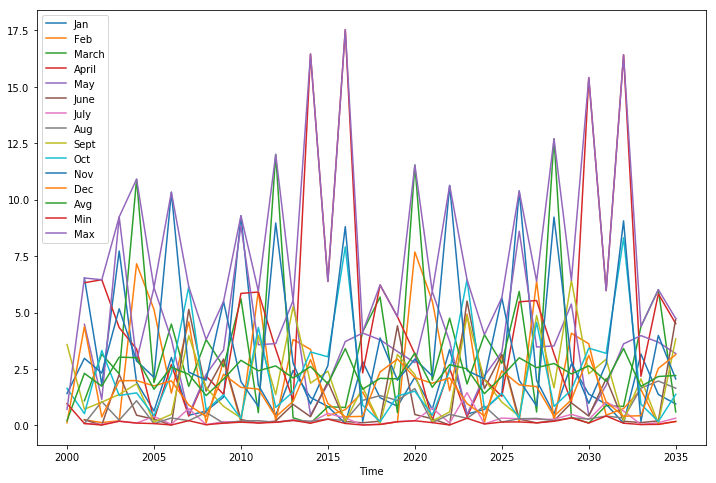

In [97]:
#kagera-sub-region-historic-and-projected-rainfall
df1.plot(figsize=(12,8))

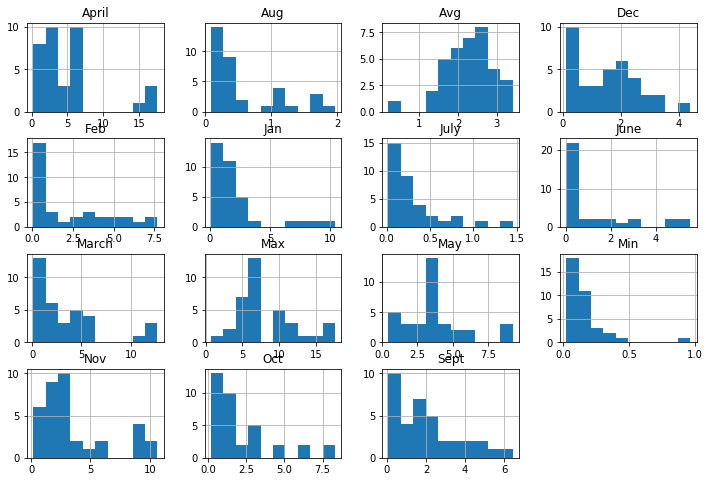

In [123]:
df1.hist(figsize=(12,8))
plt.show()

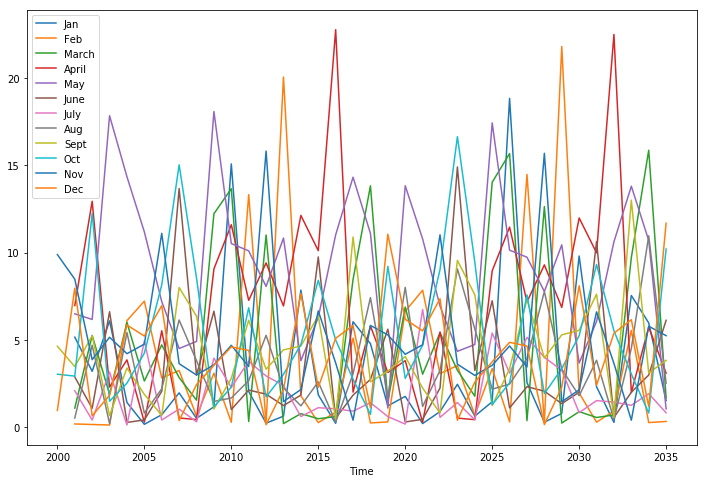

In [98]:
#lake-victoria-sub-region-historic-and-projected-rainfall
df2.plot(figsize=(12,8))

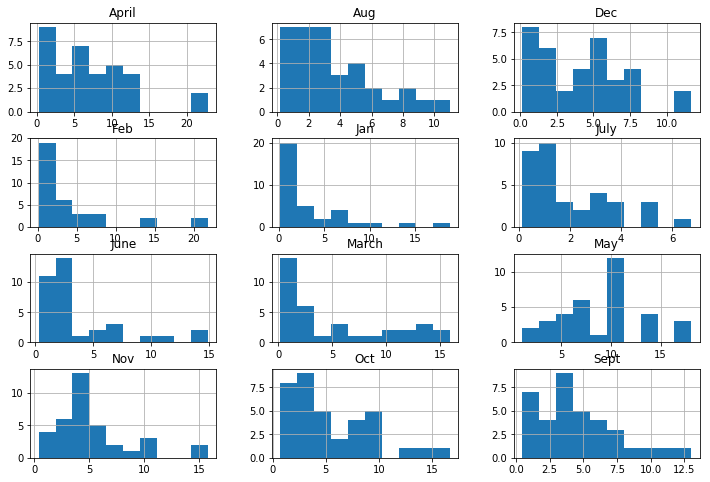

In [124]:
df2.hist(figsize=(12,8))
plt.show()

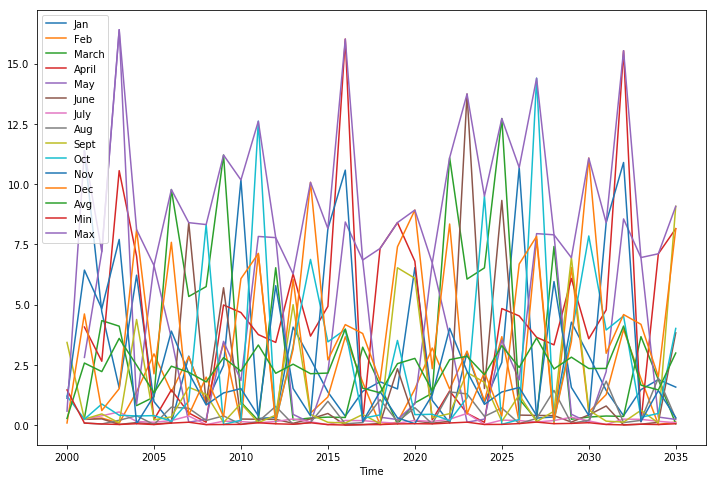

In [99]:
#simiyu-sub-region-historic-and-projected-rainfall
df3.plot(figsize=(12,8))

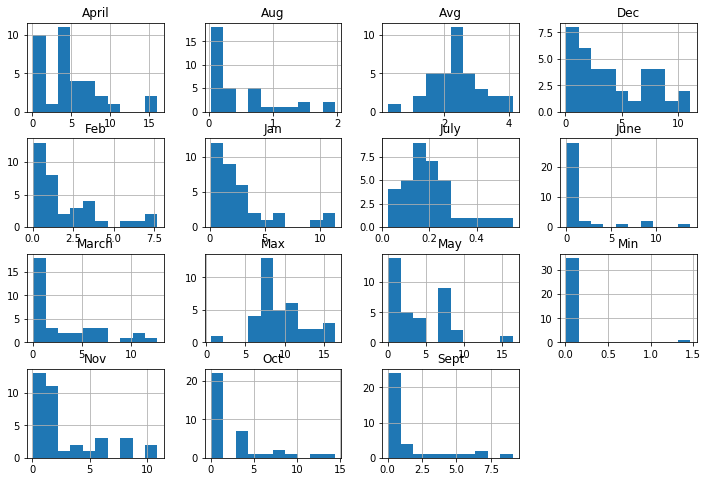

In [125]:
df3.hist(figsize=(12,8))
plt.show()

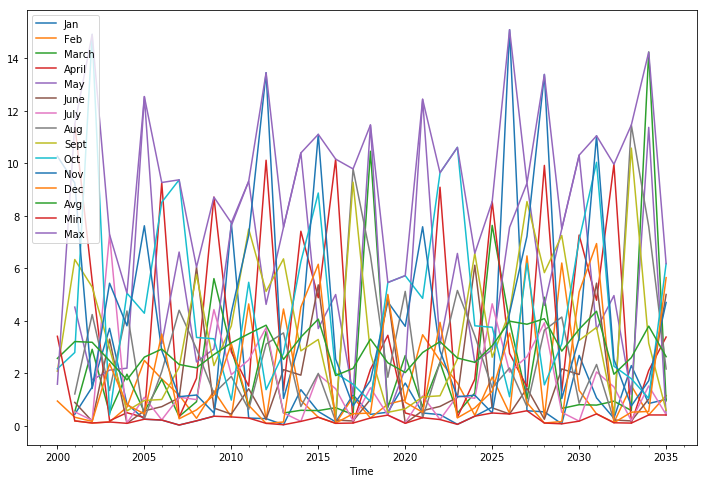

In [100]:
#victoria-nile-sub-region-historic-and-projected-rainfall
df4.plot(figsize=(12,8))

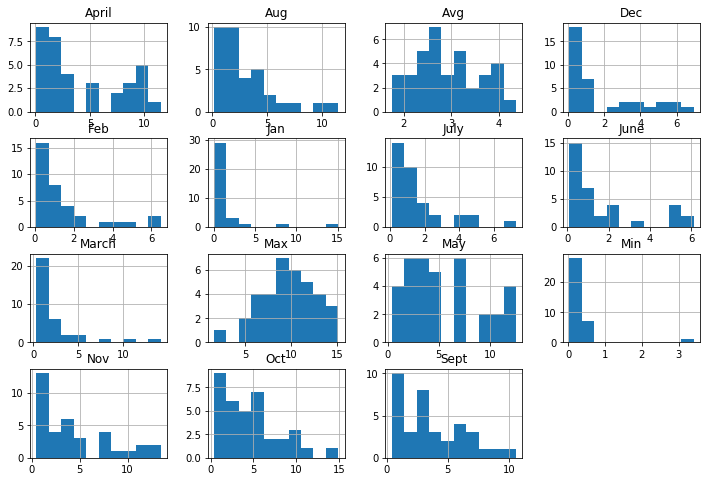

In [126]:
df4.hist(figsize=(12,8))
plt.show()

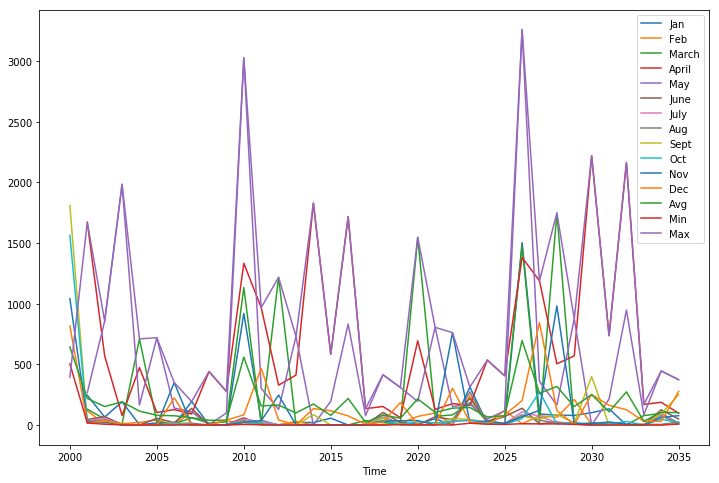

In [101]:
#run-off kagera-sub-region-historic-and-projected-rainfall
df5.plot(figsize=(12,8))

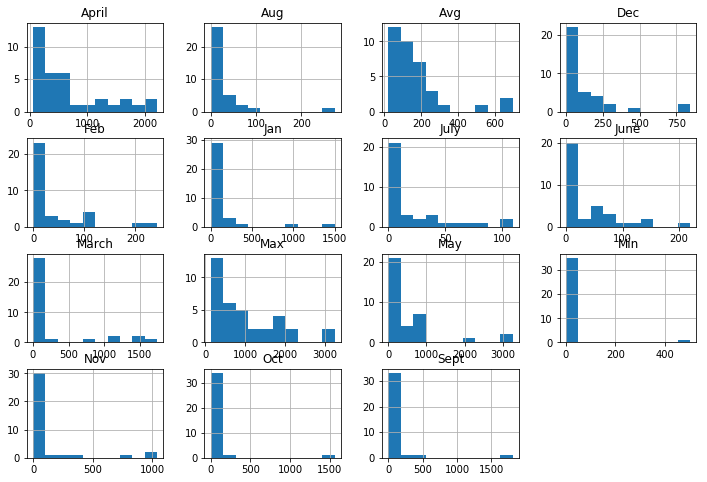

In [127]:
df5.hist(figsize=(12,8))
plt.show()

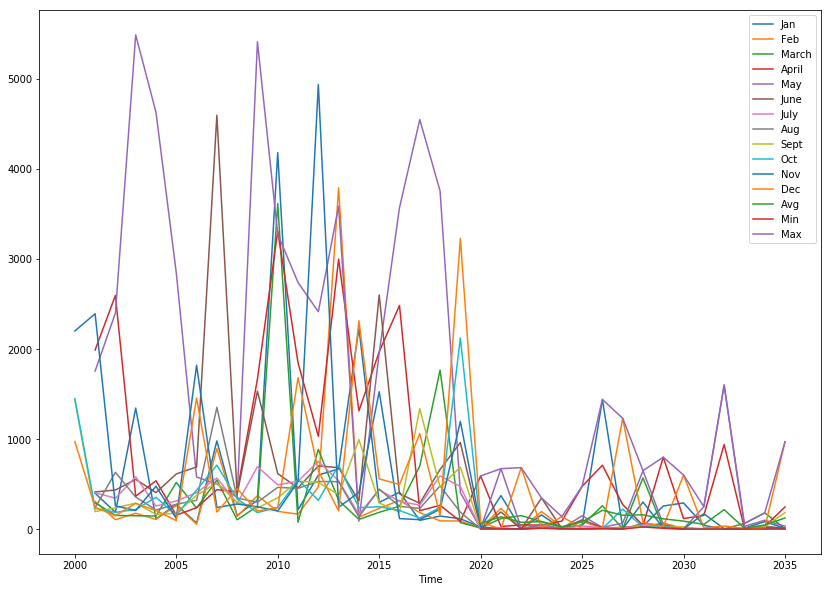

In [117]:
#run-off lake-victoria-sub-region-historic-and-projected-rainfall
df6.plot(figsize=(14,10))

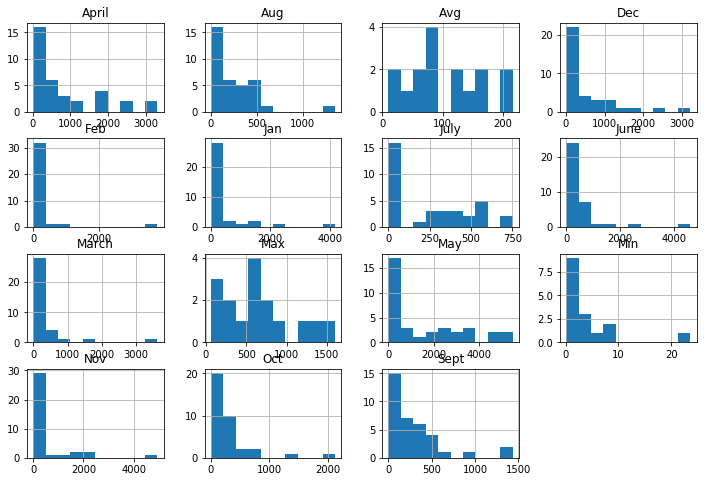

In [128]:
df6.hist(figsize=(12,8))
plt.show()

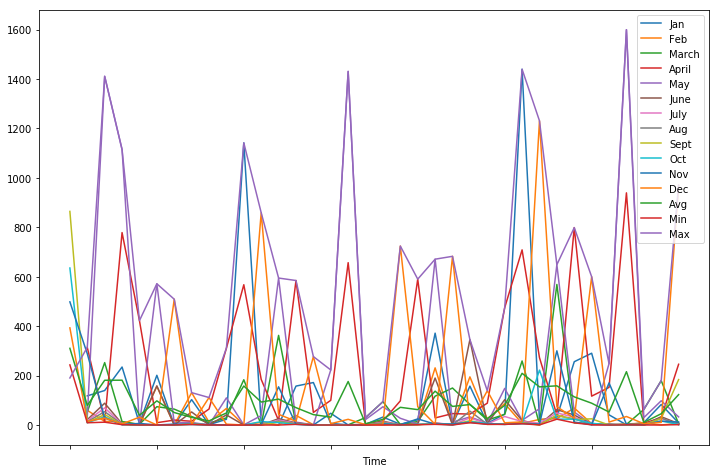

In [103]:
#run-off simiyu-sub-region-historic-and-projected-rainfall
df7.plot(figsize=(12,8))

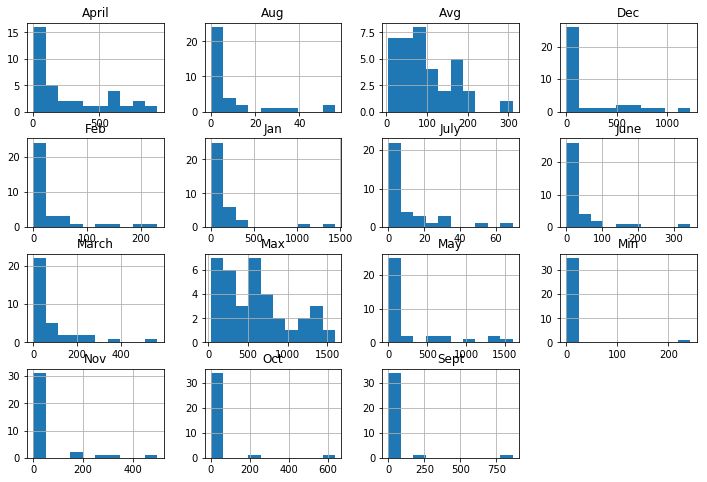

In [129]:
df7.hist(figsize=(12,8))
plt.show()

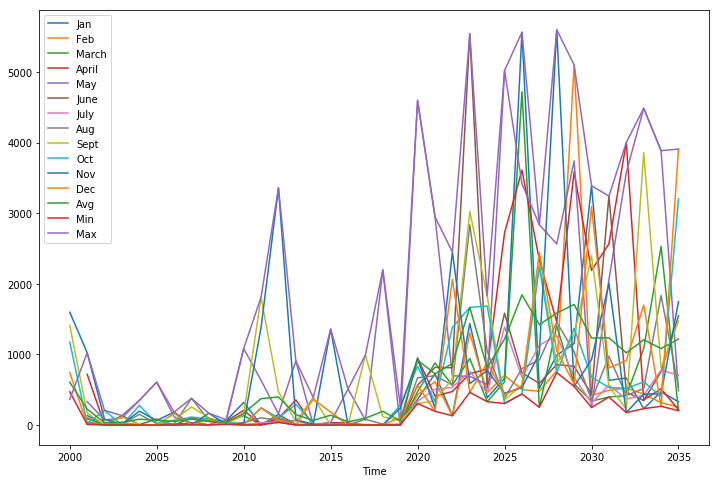

In [104]:
#run-off victoria-nile-sub-region-historic-and-projected-rainfall
df8.plot(figsize=(12,8))

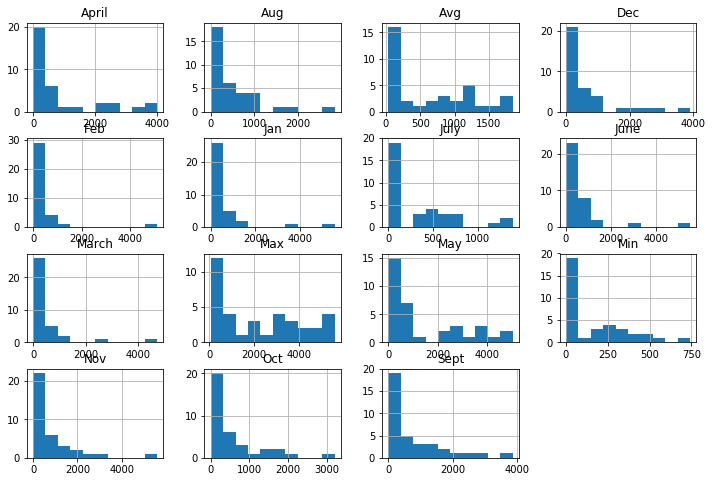

In [130]:
df8.hist(figsize=(12,8))
plt.show()

In [ ]:
#using group by to calculate average volumes over the years. 
grouped = df1.groupby(['Time'])['Avg'].mean()
grouped

## Pandas Profiling, Data visualization and Exploration of all our datasets: df1-df8

# Creating Pandas Profiling Visualizations to:  
    1. Explore the datasets.
    2. Analyse the datasets.
    3. To story tell. 

# Pandas Profiling Report for df1:kagera-sub-region-historic-and-projected-rainfall

In [ ]:
#Creating a profiling report - for df1 - kagera-sub-region-historic-and-projected-rainfall
profile1 = pandas_profiling.ProfileReport(df1)

In [ ]:
#exporting the report into html report. 
profile1.to_file(outputfile="kagera report.html")

# Pandas Profiling Report for df2:lake-victoria-sub-region-historic-and-projected-rainfall

In [ ]:
#Creating a profiling report - for df2 - lake-victoria-sub-region-historic-and-projected-rainfall
profile2 = pandas_profiling.ProfileReport(df2)

In [ ]:
#exporting the report into html report. 
profile2.to_file(outputfile="lake-victoria-sub-region report.html")

# Pandas Profiling Report for df3:simiyu-sub-region-historic-and-projected-rainfall

In [ ]:
#Creating a profiling report - for df3 - simiyu-sub-region-historic-and-projected-rainfall
profile3 = pandas_profiling.ProfileReport(df3)

In [ ]:
#exporting the report into html report. 
profile3.to_file(outputfile="simiyu report.html")

# Pandas Profiling Report for df3:victoria-nile-sub-region-historic-and-projected-rainfall

In [ ]:
#Creating a profiling report - for df4 - victoria-nile-sub-region-historic-and-projected-rainfall
profile4 = pandas_profiling.ProfileReport(df4)

In [ ]:
#exporting the report into html report. 
profile4.to_file(outputfile="victoria-nile-sub-region report.html")

# Pandas Profiling Report for df5:runoff-kagera-sub-region-historic-and-projected

In [ ]:
#Creating a profiling report - for df5 - runoff-kagera-sub-region-historic-and-projected
profile5 = pandas_profiling.ProfileReport(df5)

In [ ]:
#exporting the report into html report. 
profile5.to_file(outputfile="runoff-kagera-sub-region report.html")

# Pandas Profiling Report for df6:runoff-lake-victoria-sub-region-historic-and-projected

In [ ]:
#Creating a profiling report - for df6 - runoff-lake-victoria-sub-region-historic-and-projected
profile6 = pandas_profiling.ProfileReport(df6)

In [ ]:
#exporting the report into html report. 
profile6.to_file(outputfile="runoff-lake-victoria-sub-region report.html")

# Pandas Profiling Report for df7: runoff-simiyu-sub-region-historic-and-projected

In [ ]:
#Creating a profiling report - for df7 - runoff-simiyu-sub-region-historic-and-projected
profile7 = pandas_profiling.ProfileReport(df7)

In [ ]:
#exporting the report into html report. 
profile7.to_file(outputfile="runoff-simiyu-sub-region report.html")

# Pandas Profiling Report for df8: runoff-victoria-nile-sub-region-historic-and-projected

In [ ]:
#Creating a profiling report - for df8 - runoff-victoria-nile-sub-region-historic-and-projected
profile8 = pandas_profiling.ProfileReport(df8)

In [ ]:
#exporting the report into html report. 
profile8.to_file(outputfile="runoff-victoria-nile-sub-region report.html")

#       ~   E N D OF OUR CODE AND ANALYSIS  ~